# Smoking is bad

In [63]:
# TODO: install all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import logit

In [65]:
# TODO: load the data using the pathlib library to create the path to your data
df = pd.read_csv("data/smoking_data.csv", index_col = 0)
df

,outcome,smoker,age,gender,salary
0,Alive,Yes,23,female,7286.0
1,Alive,Yes,18,male,NaN
2,Dead,Yes,71,male,NaN
3,Alive,No,67,male,NaN
4,Alive,No,64,female,20123.0
...,...,...,...,...,...
1309,Alive,Yes,35,female,NaN
1310,Alive,No,33,female,NaN
1311,Alive,Yes,21,male,NaN
1312,Alive,No,46,female,NaN


In [67]:
# TODO: what are the dimensions of the data frame?
print(df.shape)
print("The dimensions of the data frame is (1314, 5)")

(1314, 5)
The dimensions of the data frame is (1314, 5)


In [69]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
print("It will only include the columns with integer and float dtypes.")
df.describe()

It will only include the columns with integer and float dtypes.


,age,salary
count,1314.000000,614.000000
mean,46.920091,48737.265472
std,17.432027,28575.395264
min,18.000000,1215.000000
25%,32.000000,24112.250000
50%,46.000000,48692.000000
75%,61.000000,72946.250000
max,84.000000,99677.000000


In [71]:
# TODO: do not forget to check the null values
print(df.isnull().sum())

outcome      0
smoker       0
age          0
gender       0
salary     700
dtype: int64


In [73]:
# TODO: prepare your data frame so that you can work with
df['smokes'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
df['alive'] = df['outcome'].apply(lambda x: 1 if x == 'Alive' else 0)
df

,outcome,smoker,age,gender,salary,smokes,alive
0,Alive,Yes,23,female,7286.0,1,1
1,Alive,Yes,18,male,NaN,1,1
2,Dead,Yes,71,male,NaN,1,0
3,Alive,No,67,male,NaN,0,1
4,Alive,No,64,female,20123.0,0,1
...,...,...,...,...,...,...,...
1309,Alive,Yes,35,female,NaN,1,1
1310,Alive,No,33,female,NaN,0,1
1311,Alive,Yes,21,male,NaN,1,1
1312,Alive,No,46,female,NaN,0,1


## Smoking analysis
Let's first check what your cousin did.

You should get the same results.

In [75]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
df.groupby(["smokes"]).agg(prob=("alive", np.mean)).round(3)

/var/folders/l1/3kxqj12j0q3gqphlnc4j8nbm0000gn/T/ipykernel_45995/532981948.py:2: FutureWarning: The provided callable <function mean at 0x103fc3380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["smokes"]).agg(prob=("alive", np.mean)).round(3)


,prob
smokes,
0,0.686
1,0.761


In [77]:
df["gender_f0m1"] = df['gender'].apply(lambda x:1 if x == 'female' else 0)
df

,outcome,smoker,age,gender,salary,smokes,alive,gender_f0m1
0,Alive,Yes,23,female,7286.0,1,1,1
1,Alive,Yes,18,male,NaN,1,1,0
2,Dead,Yes,71,male,NaN,1,0,0
3,Alive,No,67,male,NaN,0,1,0
4,Alive,No,64,female,20123.0,0,1,1
...,...,...,...,...,...,...,...,...
1309,Alive,Yes,35,female,NaN,1,1,1
1310,Alive,No,33,female,NaN,0,1,1
1311,Alive,Yes,21,male,NaN,1,1,0
1312,Alive,No,46,female,NaN,0,1,1


In [79]:
df.groupby(["gender_f0m1"]).agg(prob=("alive", np.mean)).round(3)

/var/folders/l1/3kxqj12j0q3gqphlnc4j8nbm0000gn/T/ipykernel_45995/3269693145.py:1: FutureWarning: The provided callable <function mean at 0x103fc3380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["gender_f0m1"]).agg(prob=("alive", np.mean)).round(3)


,prob
gender_f0m1,
0,0.691
1,0.750


In [85]:
print("The data shows higher survival probabilities for male. If smoking and survival are correlated differently for males vs. females, gender could confound the relationship between smoking and survival.")

The data shows higher survival probabilities for male. If smoking and survival are correlated differently for males vs. females, gender could confound the relationship between smoking and survival.


In [87]:
gender_dist = df.groupby(['smokes', 'gender']).size().unstack()
print("\nGender distribution by smoking status:\n", gender_dist)


Gender distribution by smoking status:
 gender  female  male
smokes              
0          357   375
1          264   318


Mean age by smoking status:  smokes
0    48.699454
1    44.682131
Name: age, dtype: float64


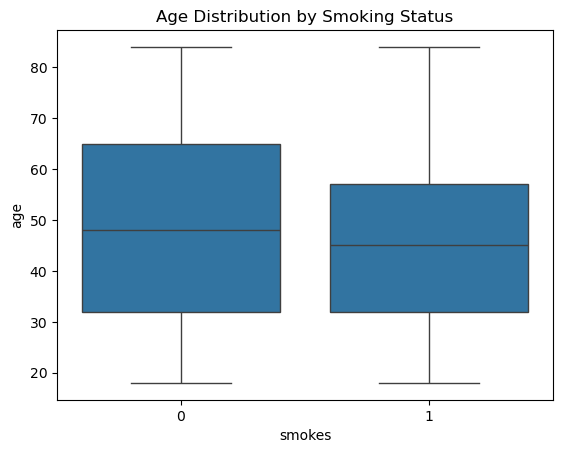

If smokers are, on average, younger than non-smokers, this could explain why they seem to survive more frequently, as younger people generally have higher survival rates.


In [91]:
# Analyze age distribution by smoking status
print("Mean age by smoking status: ", df.groupby('smokes')['age'].mean())
sns.boxplot(x='smokes', y='age', data=df)
plt.title("Age Distribution by Smoking Status")
plt.show()
print("If smokers are, on average, younger than non-smokers, this could explain why they seem to survive more frequently, as younger people generally have higher survival rates.")

Mean salary by smoking status:  smokes
0    47811.349254
1    49849.028674
Name: salary, dtype: float64


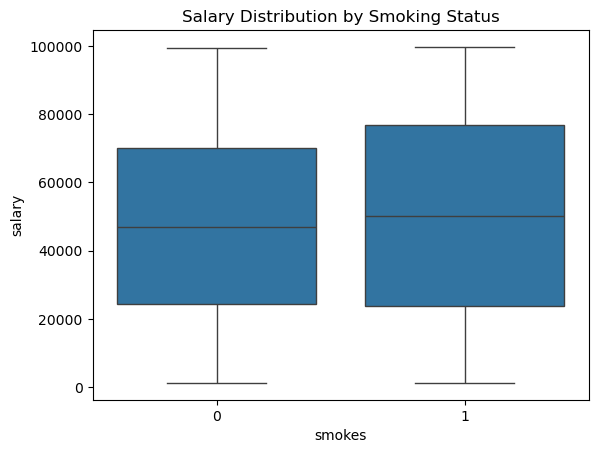

If smokers have higher salaries, this could correlate with better health outcomes, contributing to the apparent survival advantage.


In [93]:
print("Mean salary by smoking status: ", df.groupby('smokes')['salary'].mean())
sns.boxplot(x='smokes', y='salary', data=df)
plt.title("Salary Distribution by Smoking Status")
plt.show()
print("If smokers have higher salaries, this could correlate with better health outcomes, contributing to the apparent survival advantage.")

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

In [95]:
# Logistic regression model
model = logit("alive ~ smokes + age + gender_f0m1 + salary", data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.362831
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  alive   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.3866
Time:                        18:17:32   Log-Likelihood:                -222.78
converged:                       True   LL-Null:                       -363.20
Covariance Type:            nonrobust   LLR p-value:                 1.464e-59
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.6301      0.716     10.652      0.000       6.226       9.034
smokes         -0.2587    

A non-significant or small effect of smokes in this model would suggest that smoking is not truly associated with increased survival when adjusting for other factors.
If the regression analysis shows that smokes has little to no significant effect on survival after controlling for age, gender, and salary, it would support the hypothesis that smoking does not increase life expectancy. In this case, the initially observed higher survival among smokers would likely be due to confounding factors rather than smoking itself.